# Adult sallary prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\Sagar Guttal\Desktop\Data analysis(Netz)\End to end projects\Adult sallary prediction\adult_data.csv"
data=pd.read_csv(path)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#changed the column names
data.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [6]:
#new column names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [7]:
data.shape

(32561, 15)

### Data preprocessing

* Checking null values

In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [9]:
#datypes of each column
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

In [10]:
#checking unique values in each column which object dtype have
for column in data.columns:
    if data[column].dtype == "object":
        print(f"{column} has unique values :-")
        print(data[column].unique())
        print("*"*50)

workclass has unique values :-
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
**************************************************
education has unique values :-
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
**************************************************
marital_status has unique values :-
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
**************************************************
occupation has unique values :-
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
***********************

******************** age ********************


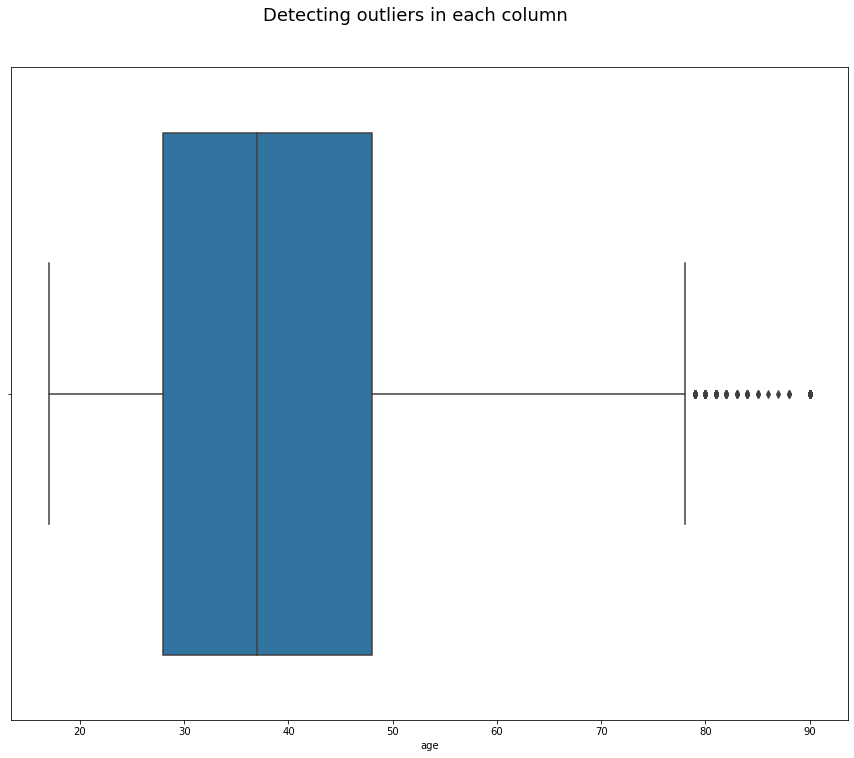

******************** fnlwgt ********************


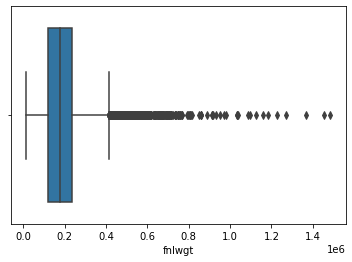

******************** education_num ********************


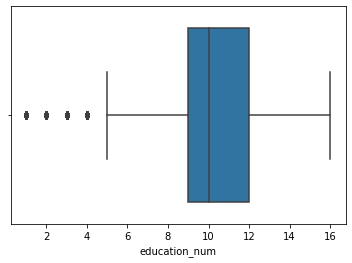

******************** capital_gain ********************


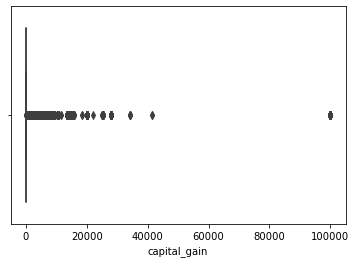

******************** capital_loss ********************


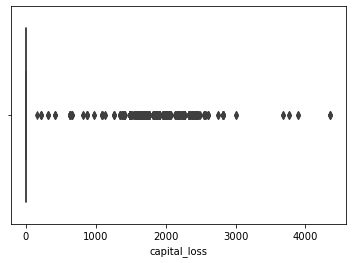

******************** hours_per_week ********************


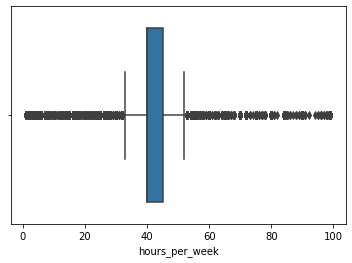

In [11]:
## Lets check the outliers in each column
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Detecting outliers in each column", fontsize=18, y=0.95)
             
for n,column in enumerate(data.columns):
    if data[column].dtype != "object":
        print("*"*20,column,"*"*20)
        sns.boxplot(x=data[column])
        plt.show()

******************** age ********************


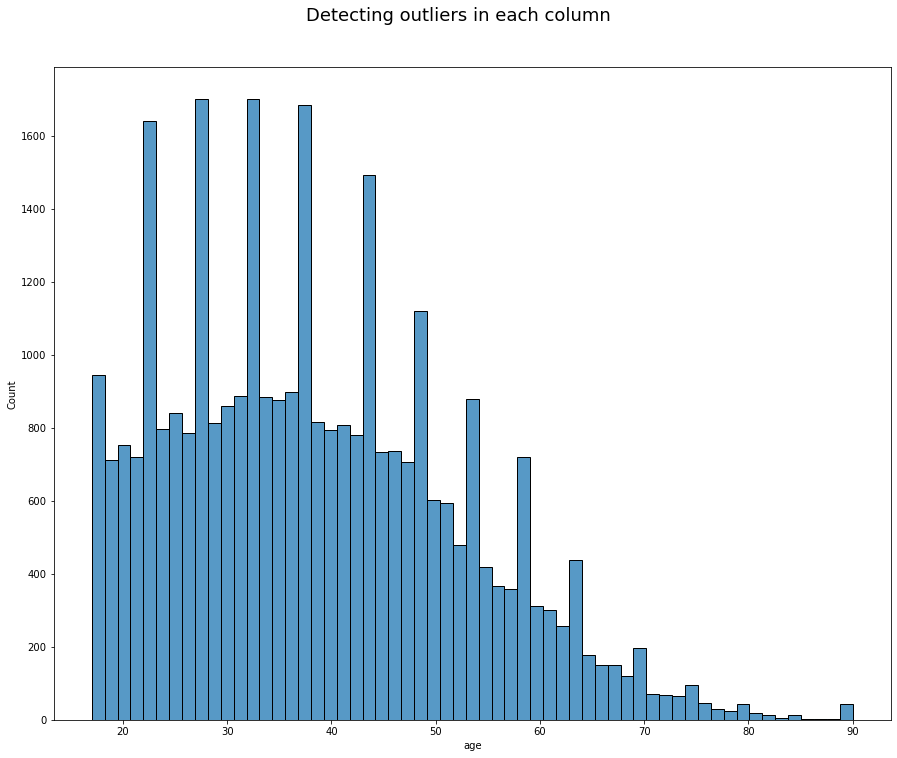

******************** fnlwgt ********************


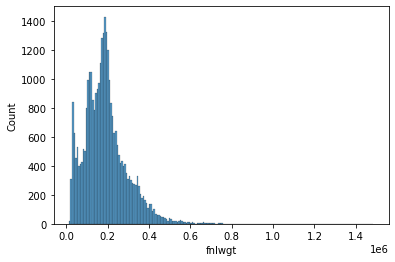

******************** education_num ********************


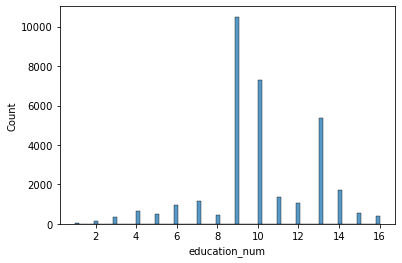

******************** capital_gain ********************


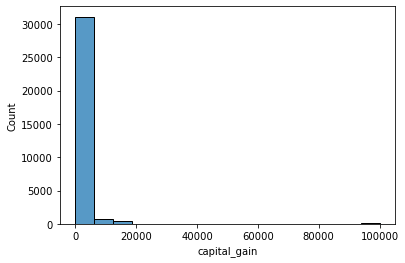

******************** capital_loss ********************


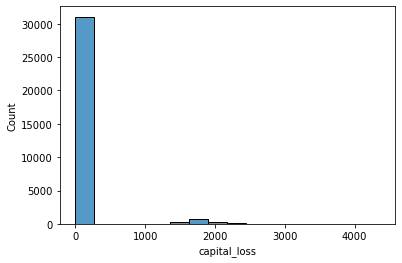

******************** hours_per_week ********************


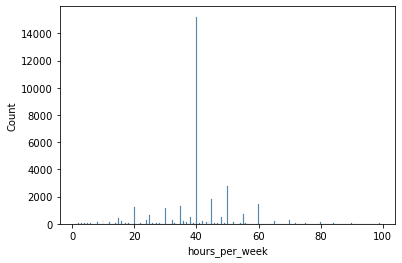

In [12]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Detecting outliers in each column", fontsize=18, y=0.95)
             
for n,column in enumerate(data.columns):
    if data[column].dtype != "object":
        print("*"*20,column,"*"*20)
        sns.histplot(x=data[column])
        plt.show()

### Removing outliers

#### education_num column

In [13]:
def remove_outlier_education_column(data):
    IQR=data["education_num"].quantile(0.75) - data["education_num"].quantile(0.25)
    
    lower_range=data["education_num"].quantile(0.25) - (1.5 * IQR)
    upper_range=data["education_num"].quantile(0.75) + (1.5 * IQR)
    
    data.loc[data["education_num"] <= lower_range, "education_num"] = lower_range
    data.loc[data["education_num"] >= upper_range, "education_num"] = upper_range

In [14]:
remove_outlier_education_column(data)

<AxesSubplot:xlabel='education_num'>

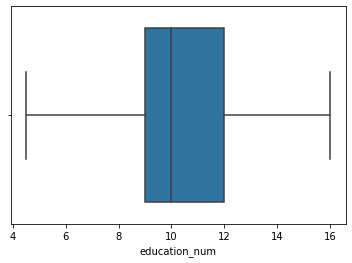

In [15]:
sns.boxplot(x=data.education_num)

* capital loss

<AxesSubplot:xlabel='capital_loss', ylabel='count'>

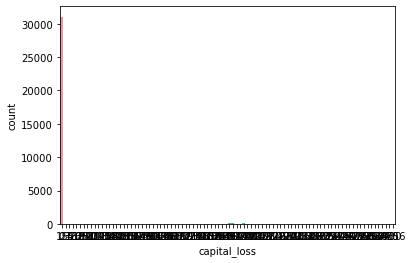

In [16]:
sns.countplot(x=data.capital_loss)

* Most of capital loss are zero , convert it into log loss

In [17]:
def capital_loss_log(data):
    data["capital_loss"]= np.where(data["capital_loss"] == 0,np.nan,data["capital_loss"])
    data["capital_loss"]= np.log(data["capital_loss"])
    data["capital_loss"]= data["capital_loss"].replace(np.nan,0)

In [18]:
capital_loss_log(data)

C:\Users\Sagar Guttal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_loss', ylabel='Density'>

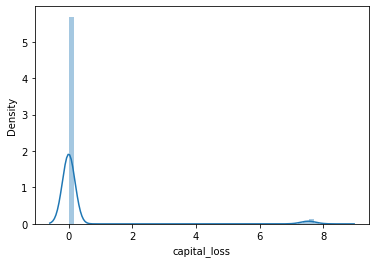

In [19]:
sns.distplot(data["capital_loss"])

<AxesSubplot:xlabel='capital_loss'>

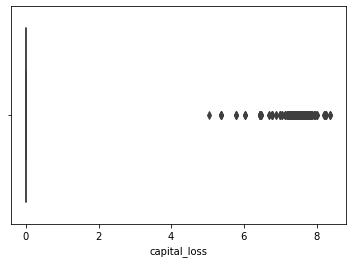

In [20]:
sns.boxplot(x=data["capital_loss"])

In [21]:
def remove_outlier_capital_loss(data):
    IQR = data["capital_loss"].quantile(0.75) - data["capital_loss"].quantile(0.25)
    
    lower_range = data["capital_loss"].quantile(0.25) - (1.5 * IQR)
    upper_range = data["capital_loss"].quantile(0.75) + (1.5 * IQR)
    
    data.loc[data["capital_loss"] <= lower_range,"capital_loss"] = lower_range
    data.loc[data["capital_loss"] >= upper_range,"capital_loss"] = upper_range

In [22]:
remove_outlier_capital_loss(data)

<AxesSubplot:xlabel='capital_loss'>

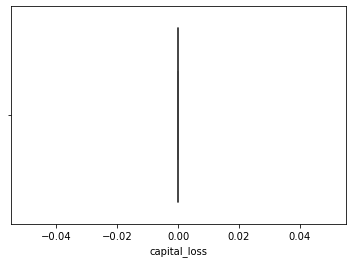

In [23]:
sns.boxplot(x=data["capital_loss"])

In [24]:
def capital_gain_log(data):
    data["capital_gain"]= np.where(data["capital_gain"] == 0,np.nan,data["capital_gain"])
    data["capital_gain"]= np.log(data["capital_gain"])
    data["capital_gain"]= data["capital_gain"].replace(np.nan,0)

* capital gain

In [25]:
def remove_outlier_capital_loss(data):
    IQR = data["capital_gain"].quantile(0.75) - data["capital_gain"].quantile(0.25)
    
    lower_range = data["capital_gain"].quantile(0.25) - (1.5 * IQR)
    upper_range = data["capital_gain"].quantile(0.75) + (1.5 * IQR)
    
    data.loc[data["capital_gain"] <= lower_range,"capital_gain"] = lower_range
    data.loc[data["capital_gain"] >= upper_range,"capital_gain"] = upper_range

In [26]:
remove_outlier_capital_loss(data)

<AxesSubplot:xlabel='capital_gain'>

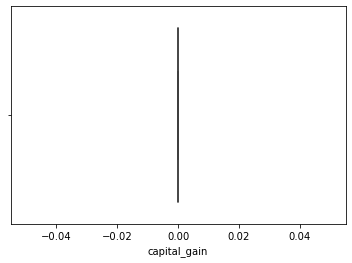

In [27]:
sns.boxplot(x=data["capital_gain"])

* hours_per_week

In [28]:
def remove_outlier_hours_per_week(data):
    IQR=data["hours_per_week"].quantile(0.75) - data["hours_per_week"].quantile(0.25)
    
    lower_range= data["hours_per_week"].quantile(0.25) - (1.5*IQR)
    upper_range= data["hours_per_week"].quantile(0.75) + (1.5*IQR)
    
    data.loc[data["hours_per_week"] <= lower_range,"hours_per_week"]= lower_range
    data.loc[data["hours_per_week"] >= upper_range,"hours_per_week"]= upper_range

In [29]:
remove_outlier_hours_per_week(data)

<AxesSubplot:xlabel='hours_per_week'>

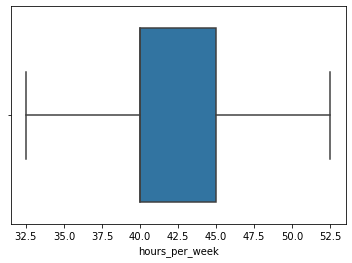

In [30]:
sns.boxplot(x=data["hours_per_week"])

### Feature engineering

In [31]:
label_salary = {value: key for key, value in enumerate(data['salary'].unique())}
data['salary'] = data['salary'].map(label_salary)

In [32]:
data['salary'].unique()

array([0, 1], dtype=int64)

In [33]:
label_sex= {value : key for key, value in enumerate(data["sex"].unique())}
data["sex"] = data["sex"].map(label_sex)

In [34]:
data['sex'].unique()

array([0, 1], dtype=int64)

In [35]:
label_race={value:key for key,value in enumerate(data["race"].unique())}
data["race"]= data["race"].map(label_race)

In [36]:
data['race'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [37]:
label_relation={value:key for key, value in enumerate(data["relationship"].unique())}
data["relationship"]= data["relationship"].map(label_relation)

In [38]:
data['relationship'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [39]:
label_occ={value:key for key ,value in enumerate(data["occupation"].unique())}
data["occupation"]= data["occupation"].map(label_occ)

In [40]:
data["occupation"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [41]:
label_material_status={ value:key for key,value in enumerate(data["marital_status"].unique())}
data["marital_status"]=data["marital_status"].map(label_material_status)

In [42]:
data["marital_status"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [43]:
label_education={ value:key for key,value in enumerate(data["education"].unique())}
data["education"]=data["education"].map(label_education)

In [44]:
data['workclass'] = np.where(data['workclass'] == ' ?', 'Missing', data['workclass'])
label_workclass = {value: key for key, value in enumerate(data['workclass'].unique())}
data['workclass'] = data['workclass'].map(label_workclass)

In [45]:
data['native_country'] = np.where(data['native_country'] == ' ?', 'Missing', data['native_country'])
label_workclass = {value: key for key, value in enumerate(data['native_country'].unique())}
data['native_country'] = data['native_country'].map(label_workclass)

<AxesSubplot:>

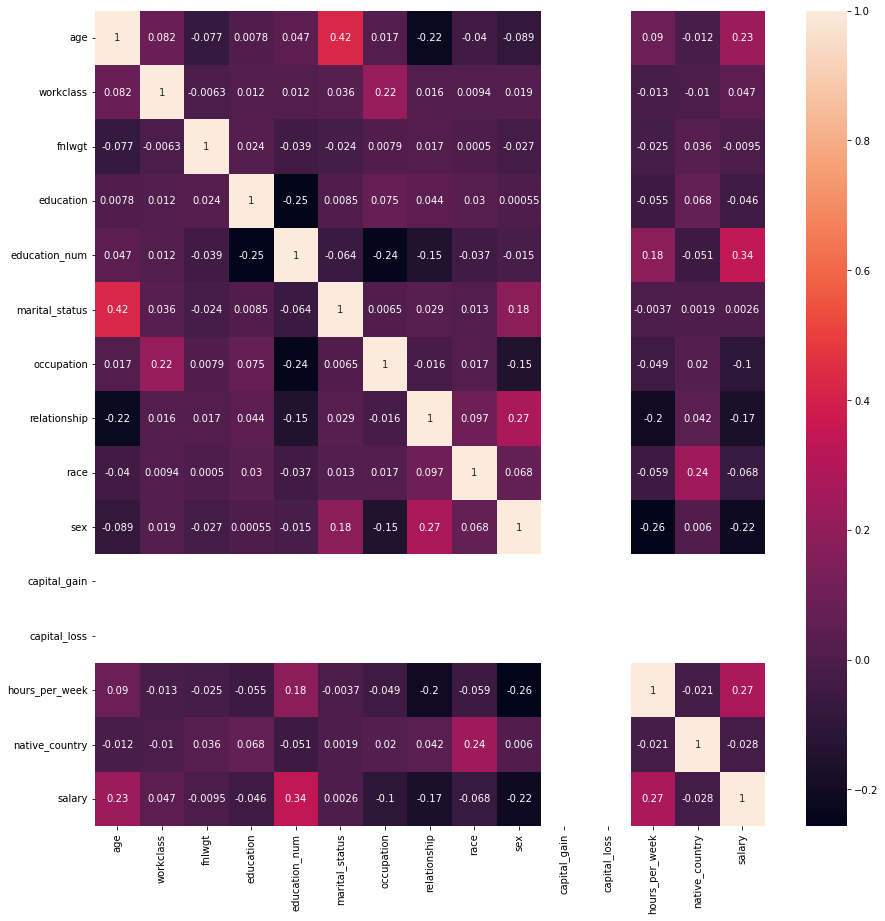

In [46]:
plt.figure(figsize=(15, 15))
corr = data.corr()
sns.heatmap(corr, annot=True)

In [47]:
data.drop("fnlwgt",axis=1,inplace=True)

### After feature engineering

In [48]:
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,0,0,0.0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,0,0,0.0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,0,0,0.0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,0,0,0.0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,1,0,0.0,40.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,6,12.0,1,10,2,0,1,0,0.0,38.0,0,0
32557,40,2,1,9.0,1,9,1,0,0,0,0.0,40.0,0,1
32558,58,2,1,9.0,6,0,4,0,1,0,0.0,40.0,0,0
32559,22,2,1,9.0,0,0,3,0,0,0,0.0,32.5,0,0


In [49]:
data.dtypes

age                 int64
workclass           int64
education           int64
education_num     float64
marital_status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital_gain        int64
capital_loss      float64
hours_per_week    float64
native_country      int64
salary              int64
dtype: object

### Split data into X and Y

In [50]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [51]:
X

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,0,0,13.0,0,0,0,0,0,0,0.0,40.0,0
1,50,1,0,13.0,1,1,1,0,0,0,0.0,32.5,0
2,38,2,1,9.0,2,2,0,0,0,0,0.0,40.0,0
3,53,2,2,7.0,1,2,1,1,0,0,0.0,40.0,0
4,28,2,0,13.0,1,3,2,1,1,0,0.0,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,6,12.0,1,10,2,0,1,0,0.0,38.0,0
32557,40,2,1,9.0,1,9,1,0,0,0,0.0,40.0,0
32558,58,2,1,9.0,6,0,4,0,1,0,0.0,40.0,0
32559,22,2,1,9.0,0,0,3,0,0,0,0.0,32.5,0


In [52]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

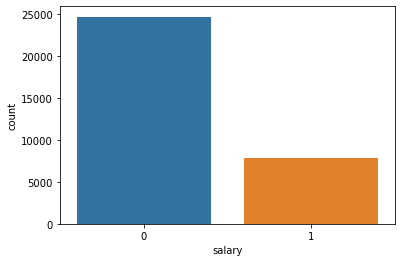

In [53]:
#target column class values are imbalance
sns.countplot(x=y)

* We can observe that the majority of the labels are from class 0 and only a few are from class 1
* Because of class imbalance The model will start predicting every new observation as 0 or majority class. 
* How to Handle Class Imbalance?
* One methode is upsampling or downsamplining.
* But logistic regression implementation that supports class weighting. We will use the inbuilt parameter “class_weight” while creating an instance of the Logistic Regression model.
* Both the majority and minority classes will be given separate weights. During the training phase, the weight differences will influence the classification of the classes

### Split data into training and testing part

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
#features
print("Train data shape: {}".format(x_train.shape))
print("Test data shape: {}".format(x_test.shape))

Train data shape: (26048, 13)
Test data shape: (6513, 13)


In [56]:
#target
print("Train data shape: {}".format(y_train.shape))
print("Test data shape: {}".format(y_test.shape))

Train data shape: (26048,)
Test data shape: (6513,)


### Feature scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [58]:
### model selection
from sklearn.linear_model import LogisticRegression

* Train the model with default parameter

In [59]:
ls_base_model=LogisticRegression()
ls_base_model.fit(x_train_scaled,y_train)
base_predictions=ls_base_model.predict(x_test_scaled)

* Evaluate base model performance

In [60]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score

In [61]:
confusion_matrix(y_test,base_predictions)

array([[4581,  337],
       [ 973,  622]], dtype=int64)

In [62]:
accuracy_score(y_test,base_predictions)

0.7988638108398587

In [63]:
print(classification_report(y_test,base_predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4918
           1       0.65      0.39      0.49      1595

    accuracy                           0.80      6513
   macro avg       0.74      0.66      0.68      6513
weighted avg       0.78      0.80      0.78      6513



In [64]:
precision_score(y_test,base_predictions)

0.64859228362878

In [65]:
recall_score(y_test,base_predictions)

0.38996865203761755

### Hyperparameter Optimization for the Logistic Regression Model

* The process of finding the optimum fit or ideal model architecture is known as hyperparameter tuning. Hyperparameters control the overfitting or underfitting of the model. Hyperparameter tuning can be done using algorithms like Grid Search or Random Search

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [72]:
#define the model
tuning_lr_model=LogisticRegression()
#For imbalance class - tuning weight for minority class then weight for majority class will be 1-weight of minority class
weights=np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param={
    "C":[0.1,0.5,1,10,15,20],
    "penalty":["l2"],
    "class_weight":[{0:x,1:1.0-x}for x in weights]
}
#create 10 fold
folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Call the gridsearch function for tunning the parameters
model_lr_1=GridSearchCV(estimator=tuning_lr_model,param_grid=param,scoring="accuracy",cv=folds,return_train_score=True,)
#fit the training models
model_lr_1.fit(x_train_scaled,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

In [74]:
print("model best score :- ",model_lr_1.best_score_)
print("Best hyperparameters :-",model_lr_1.best_params_)

model best score :-  0.8067031555085709
Best hyperparameters :- {'C': 0.5, 'class_weight': {0: 0.5059118236472946, 1: 0.4940881763527054}, 'penalty': 'l2'}


### Building final model

In [75]:
final_model=LogisticRegression(C= 0.5, class_weight={0: 0.5059118236472946, 1: 0.4940881763527054},penalty= 'l2')
final_model.fit(x_train_scaled,y_train)
final_predictions=final_model.predict(x_test_scaled)

In [76]:
print(classification_report(y_test,final_predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88      4918
           1       0.65      0.38      0.48      1595

    accuracy                           0.80      6513
   macro avg       0.74      0.66      0.68      6513
weighted avg       0.78      0.80      0.78      6513



In [77]:
confusion_matrix(y_test,final_predictions)

array([[4594,  324],
       [ 988,  607]], dtype=int64)

In [78]:
precision_score(y_test,final_predictions)

0.6519871106337272

In [79]:
recall_score(y_test,final_predictions)

0.380564263322884

In [80]:
accuracy_score(y_test,final_predictions)

0.7985567326884692